# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [8]:
def apply_svd_custom(X_train, X_test, n_components):
    """
    Perform SVD from scratch and reduce data to 'n_components' dimensions.
    """
    # Step 1: Compute the covariance matrix
    covariance_matrix = np.dot(X_train.T, X_train)

    # Step 2: Eigenvalue decomposition of covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Take the real part to avoid complex numbers
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)

    # Step 3: Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(-eigenvalues)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 4: Select top n_components eigenvectors
    top_eigenvectors = eigenvectors[:, :n_components]

    # Step 5: Project the data onto the new space (dimensionality reduction)
    X_train_svd = np.dot(X_train, top_eigenvectors)
    X_test_svd = np.dot(X_test, top_eigenvectors)

    # Return the reduced data and top eigenvectors (for visualization of singular vectors)
    return X_train_svd, X_test_svd, eigenvectors[:, :5]  # Returning top 5 singular vectors for visualization


## Part 3: Train Logistic Regression and Measure Performance

In [9]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [6]:
svd_components = [10, 20, 50, 100, 200, 400, 784]  # You need to decide what number to search...

# Store the results
results = []
singular_vectors = None

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Call apply_svd_custom() here...
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, top_singular_vectors = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Save the results
    results.append((n_components, accuracy, training_time))

    # Save top 5 singular vectors for visualization
    if n_components == svd_components[0]:  # Only save singular vectors for the first run
        singular_vectors = top_singular_vectors


    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 1.1125 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8779, Training time: 1.5892 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 15.3409 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 56.9552 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 152.4100 seconds
Applying custom SVD with 400 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 400, Accuracy: 0.9195, Training time: 432.6732 seconds
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 867.8481 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


<ipython-input-10-175e52388455>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(components, accuracy, 'bo-', marker='o')
<ipython-input-10-175e52388455>:28: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(components, training_time, 'ro-', marker='o')


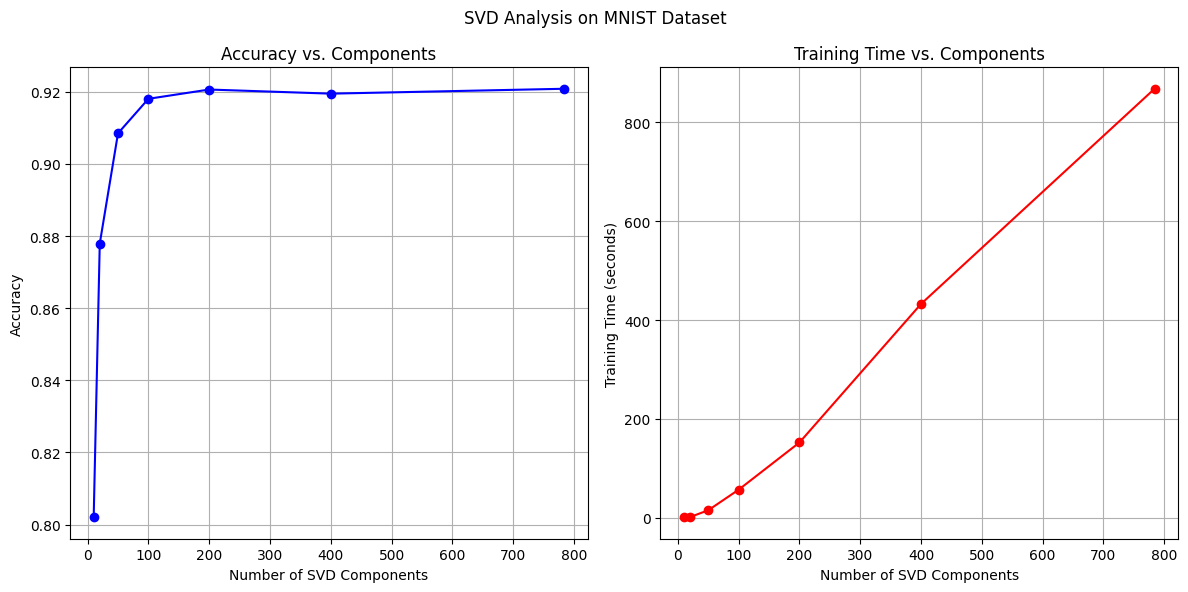

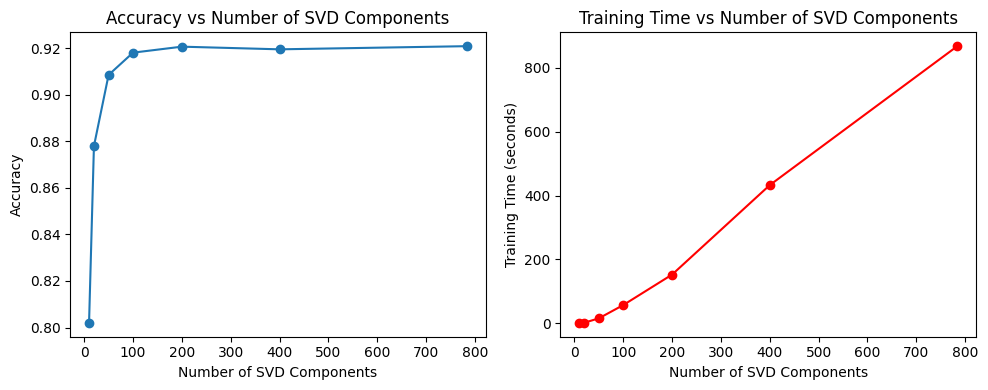

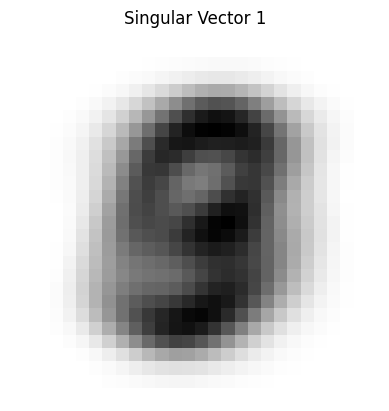

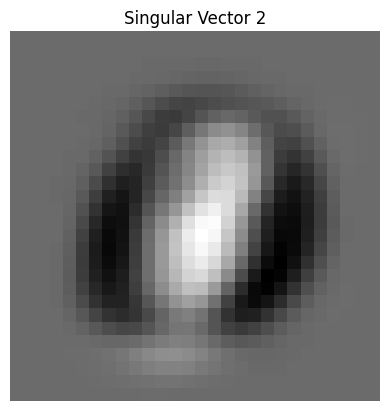

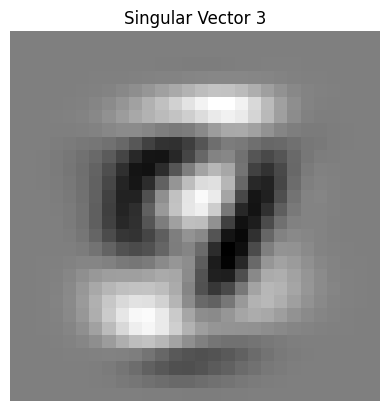

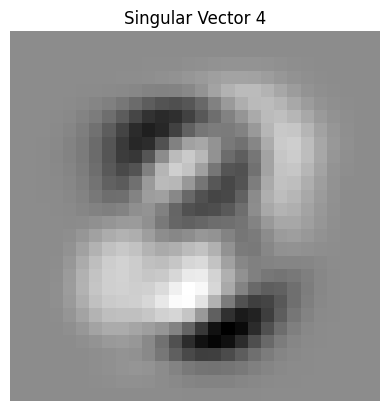

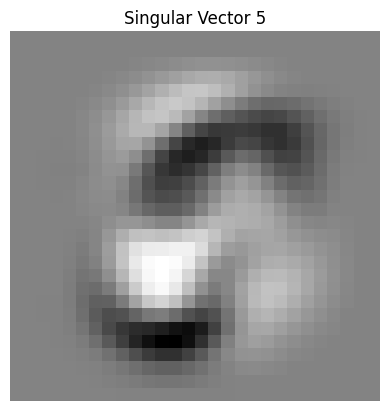

In [10]:
import matplotlib.pyplot as plt
import numpy as np
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Convert results to NumPy array for easier plotting


results = np.array(results)

# Extract components, accuracy, and training time
components = results[:, 0]
accuracy = results[:, 1]
training_time = results[:, 2]

# Create the plot
plt.figure(figsize=(12, 6))

# Subplot 1: Accuracy vs Number of SVD Components
plt.subplot(1, 2, 1)
plt.plot(components, accuracy, 'bo-', marker='o')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Components')
plt.grid(True)

# Subplot 2: Training Time vs Number of SVD Components
plt.subplot(1, 2, 2)
plt.plot(components, training_time, 'ro-', marker='o')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Components')
plt.grid(True)

# Set the main title and display the plot
plt.suptitle('SVD Analysis on MNIST Dataset')
plt.tight_layout()
plt.show()
# Plot Accuracy and Training Time
results = np.array(results)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(results[:, 0], results[:, 1], marker='o')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of SVD Components')

plt.subplot(1, 2, 2)
plt.plot(results[:, 0], results[:, 2], marker='o', color='red')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Number of SVD Components')
plt.tight_layout()
plt.show()

# Check if singular_vectors is not None before trying to plot
if singular_vectors is not None:
    # Visualize the top 5 singular vectors
    for i in range(5):
        singular_vector_image = singular_vectors[:, i].reshape(28, 28)  # Reshape to 28x28 pixels
        plt.imshow(singular_vector_image, cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')
        plt.show()
else:
    print("Singular vectors were not captured. Check the n_components condition.")

## Part 6: Analyze / Conclusion

YOUR ANSWER:

1. Accuracy vs Number of SVD Components:

Initial Increase in Accuracy: As the number of SVD components increases, the accuracy improves significantly.

Plateau at Around 200 Components: After reaching around 200 SVD components, the accuracy plateaus and stays constant at around 0.92.

2. Training Time vs Number of SVD Components:

Exponential Increase in Training Time: There is a clear exponential increase in the training time as the number of SVD components increases. For smaller components (e.g., around 100), the training time is manageable. However, as the number of components increases, the training time grows significantly, reaching over 800 seconds for the full 784 components.

Optimal Number of Components: Based on this analysis, using around 200 SVD components seems to be the optimal point for this logistic regression model. It balances both high accuracy (~0.92) and reasonable training time.

